# 직원 급여 예측 - (Best ML Algorithms)

- Dataset: 직원의 급여, 성별, 나이, 박사학위 유무
- 샘플 수 : 100

# 1. Data Exploration

In [11]:
pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 10.2 MB/s eta 0:00:00
   ---------------------------------------- 233.9/233.9 kB 7.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
#Importing the basic librarires

import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [13]:
#Importing the dataset

df = pd.read_csv('Salary.csv')
#df.drop([''], axis=1, inplace=True)
display(df.head())

target = 'Salary'
features = [i for i in df.columns if i not in [target]]

original_df = df.copy(deep=True)

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,Salary,Gender,Age,PhD
0,140.0,1,47,1
1,30.0,0,65,1
2,35.1,0,56,0
3,30.0,1,23,0
4,80.0,0,53,1



Inference: The Datset consists of 4 features & 100 samples.


In [14]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salary  100 non-null    float64
 1   Gender  100 non-null    int64  
 2   Age     100 non-null    int64  
 3   PhD     100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


In [15]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

Gender     2
PhD        2
Age       43
Salary    73
dtype: int64

In [16]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 1 numerical & 2 categorical features.


In [17]:
#Checking the stats of all the columns

display(df.describe())

,Salary,Gender,Age,PhD
count,100.000000,100.000000,100.000000,100.000000
mean,52.524500,0.500000,46.880000,0.390000
std,42.220933,0.502519,15.271469,0.490207
min,0.250000,0.000000,20.000000,0.000000
25%,20.000000,0.000000,31.500000,0.000000
50%,39.300000,0.500000,49.000000,0.000000
75%,75.500000,1.000000,60.000000,1.000000
max,190.000000,1.000000,77.000000,1.000000


# 2. Exploratory Data Analysis (EDA)

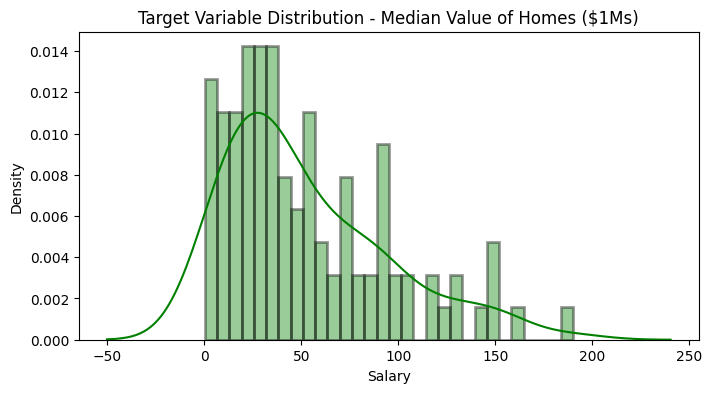

In [18]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

## 그래프
- x축 : 'Salary' 변수 , 직원의 급여를 나타냄
- y축 : 'Density', 밀도(빈도 수), 각 급여 값에 해당하는 빈도
- 타겟인 Salary의 분포는 정규분포와 유사한 양상을 보인다. 이는 데이터 값들이 평균 주변에 대칭적으로 분포하고 있음을 의미함.
- 분포의 중심 또는 평균값이 약 20달러임을 알 수 있음

                               Visualising Categorical Features:                                


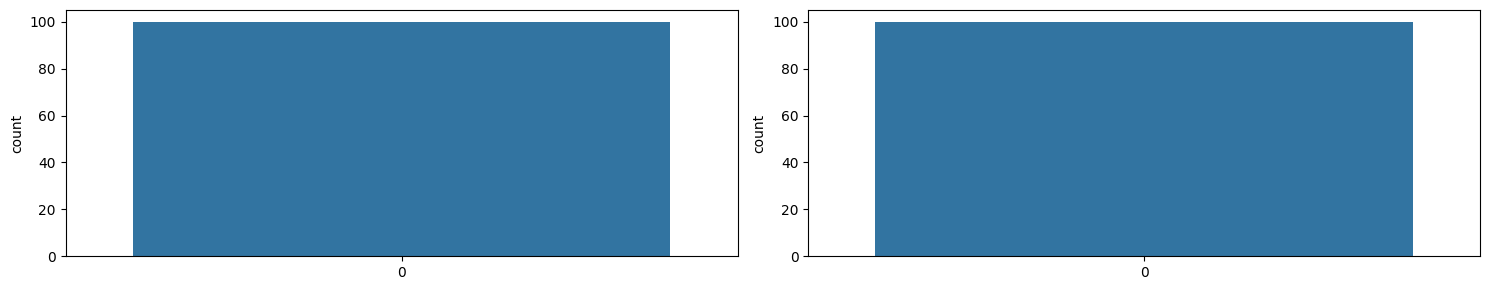

In [20]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=2
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(2,1,2)
        sns.countplot(df[cf[i]])
        
plt.tight_layout()
plt.show()

- 범주형 자료가 없음을 알 수 있음

                                 Numeric Features Distribution                                  


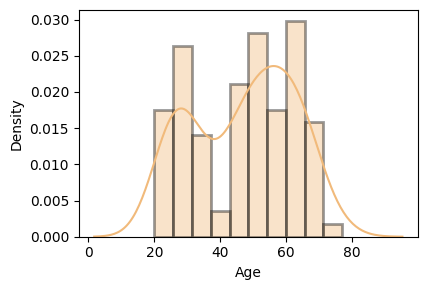

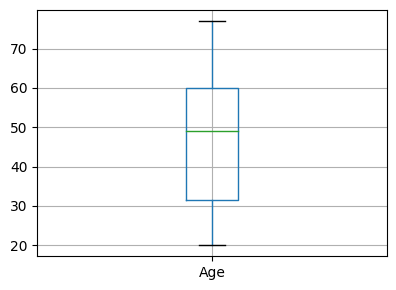

In [21]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(100))

n=4

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

- 이상치가 있는 것으로 보임, 데이터셋에서 일부 이상치가 발견되었거나, 데이터 분포에서 동떨어진 값들이 존재

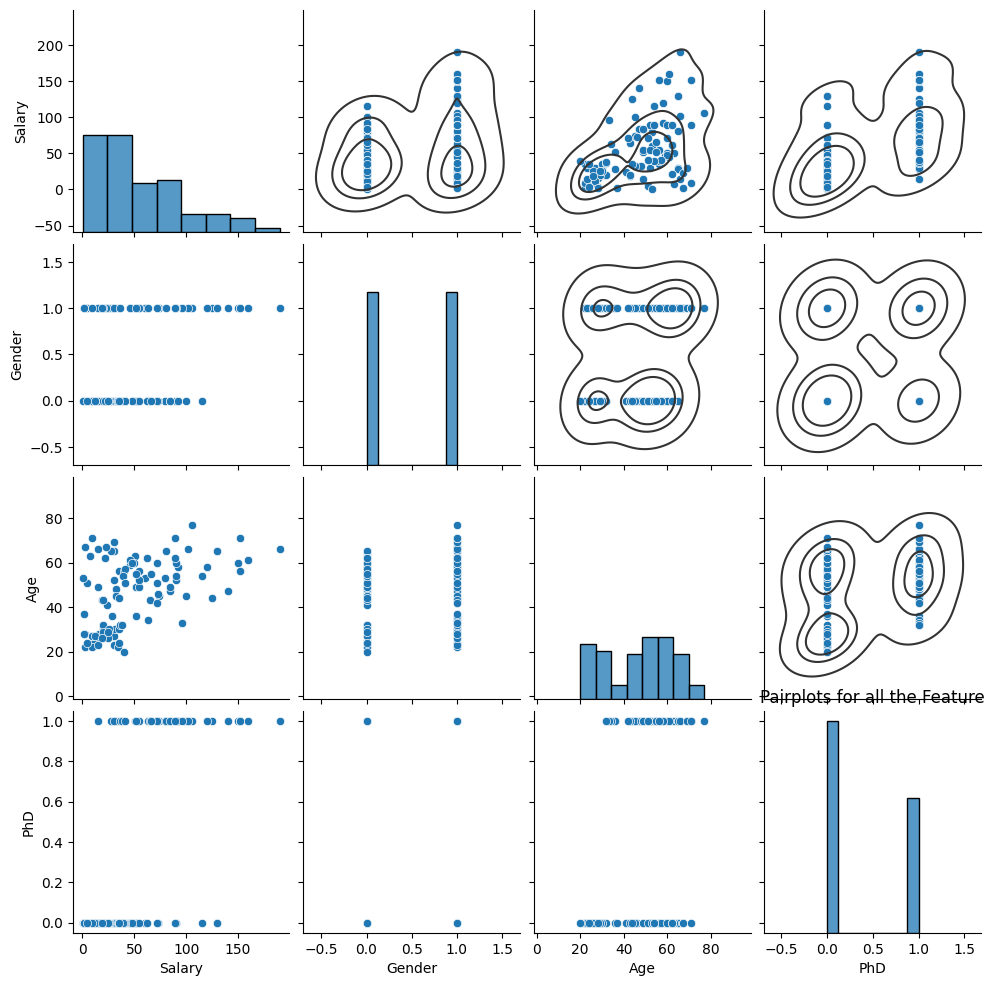

In [22]:
#Understanding the relationship between all the features

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

- 일부 특징들 간에 선형 관계가 있음, 이는 두 특징이 서로 선형적으로 의존한다는 것
- 다중공선성은 선형관계가 강할 수록 더 잘 발생함
- 다중공선성은 회귀 모델에서 예측 변수들 간의 강한 상관관계로 인해 발생하는 문제

# 3. Data Preprocessing

In [23]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: Number of duplicates dropped/fixed ---> 1


- 중복된 행이 있는지를 확인하고, 있다면 해당 행을 제거

In [24]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

        Total Null Values  Percentage
Salary                  0         0.0
Gender                  0         0.0
Age                     0         0.0
PhD                     0         0.0


In [25]:
#Converting categorical Columns to Numeric

df3 = df.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape

One-Hot Encoding on features:
Gender
PhD


(99, 4)

- 범주형을 수치형으로 바꿈

In [26]:
#Removal of outlier:

df1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,Salary,Gender,Age,PhD
0,140.0,1,47,1
1,30.0,0,65,1
2,35.1,0,56,0
3,30.0,1,23,0
4,80.0,0,53,1



Inference:
Before removal of outliers, The dataset had 99 samples.
After removal of outliers, The dataset now has 99 samples.


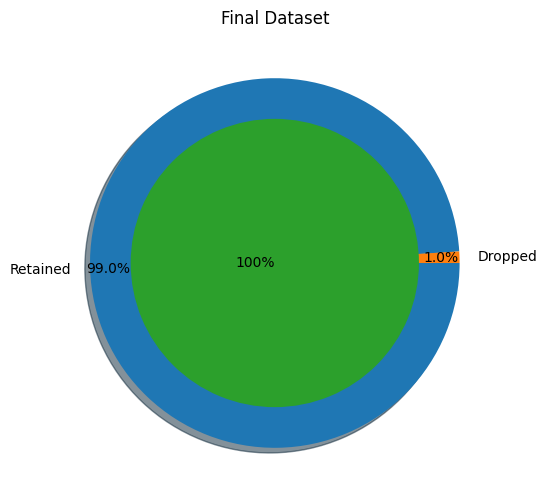


Inference: After the cleanup process, 1 samples were dropped, while retaining 1.0% of the data.


In [27]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

# 4. Data Manipulation

In [28]:
#Splitting the data intro training & testing sets

m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (99, 3) (99,) 
Training set  --->  (79, 3) (79,) 
Testing set   --->  (20, 3)  (20,)


In [29]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,Gender,Age,PhD
count,7.900000e+01,7.900000e+01,7.900000e+01
mean,-3.372829e-17,-7.149696e-17,-2.810691e-17
std,1.006390e+00,1.006390e+00,1.006390e+00
min,-9.627197e-01,-1.658134e+00,-8.469896e-01
25%,-9.627197e-01,-1.049611e+00,-8.469896e-01
50%,-9.627197e-01,1.994625e-01,-8.469896e-01
75%,1.038724e+00,9.040681e-01,1.180652e+00
max,1.038724e+00,1.993004e+00,1.180652e+00



                                          Standardardization on Testing set                                          


,Gender,Age,PhD
count,20.000000,20.000000,20.000000
mean,0.138074,0.257112,-0.238697
std,1.021572,0.837216,0.953321
min,-0.962720,-1.209748,-0.846990
25%,-0.962720,-0.328992,-0.846990
50%,1.038724,0.519738,-0.846990
75%,1.038724,0.856027,1.180652
max,1.038724,1.608674,1.180652


# 5. Feature Selection/Extraction

                                       Correlation Matrix                                       


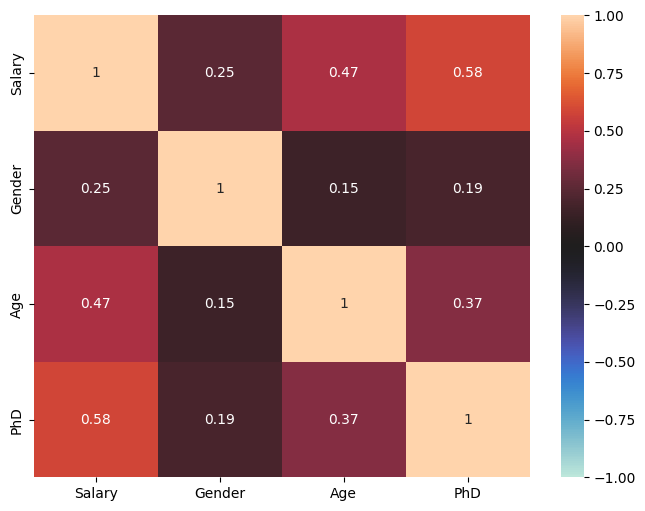

In [30]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[8,6])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

- 변수들간에 강한 다중상관관계가 있는 것으로 보임. -> 두 변수간의 선형관계가 강함

In [31]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     19.56
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           1.81e-09
Time:                        19:40:10   Log-Likelihood:                -386.86
No. Observations:                  79   AIC:                             781.7
Df Residuals:                      75   BIC:                             791.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.9139      3.741     14.413      0.000      46.462      61.366
Gender         6.0097      3.801      1.581      0.118      -1.563      13.583
Age           15.3796      4.250      3.618      0.001       6.912      23.847
PhD           16.0805      4.262      3.773      0.000       7.591      24.570
==============================================================================
Omnibus:                        2.880   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.237   Jarque-Bera (JB):                2.265
Skew:                           0.233   Prob(JB):                        0.322
Kurtosis:                       3.686   Cond. No.                         1.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 표준 오차가 오차의 공분산 행렬이 올바르게 명시되어 있다고 가정함

## 5.1. Manual Method - VIF

Dropped Features -->  ['PhD', 'Gender']


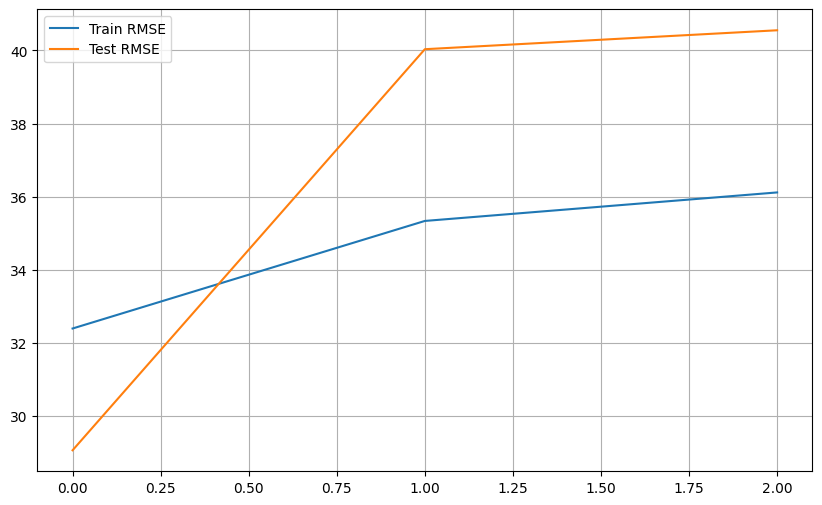

In [32]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
#Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
#Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

DROP=[];b=[]
LR = LinearRegression()
LR.fit(Train_X_std, Train_Y)

pred1 = LR.predict(Train_X_std)
pred2 = LR.predict(Test_X_std)

Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

for i in range(len(Train_X_std.columns)-1):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

        #Trd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Train_Y, pred1)),2)
        #Tsd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),2)
        
print('Dropped Features --> ',DROP)
#plt.plot(b)
#plt.show()
#print(API.summary())

# plt.figure(figsize=[20,4])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

## 5.2. Automatic Method - RFE,  Recursive Feature Elimination

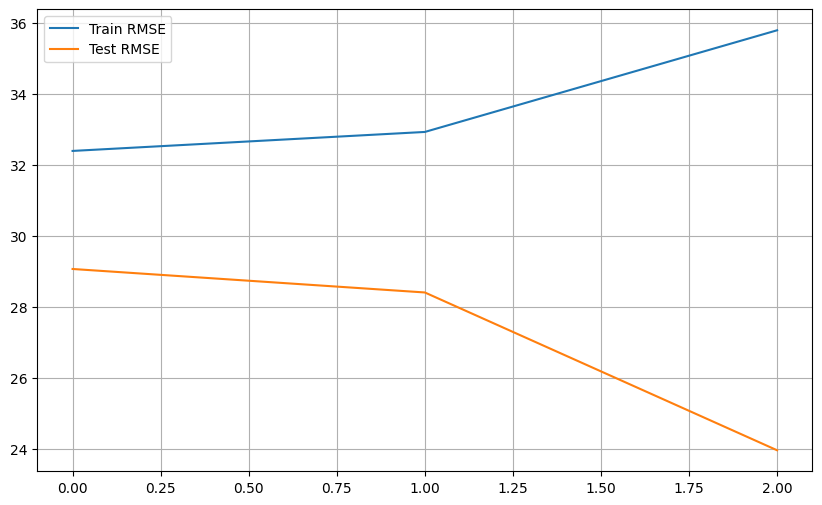

In [33]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-1
for i in range(m):
    lm = LinearRegression()
    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)             # running RFE
    rfe = rfe.fit(Train_X_std, Train_Y)

    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

    pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

# plt.figure(figsize=[20,4])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

## 5.3. Feature Elmination using PCA Decomposition

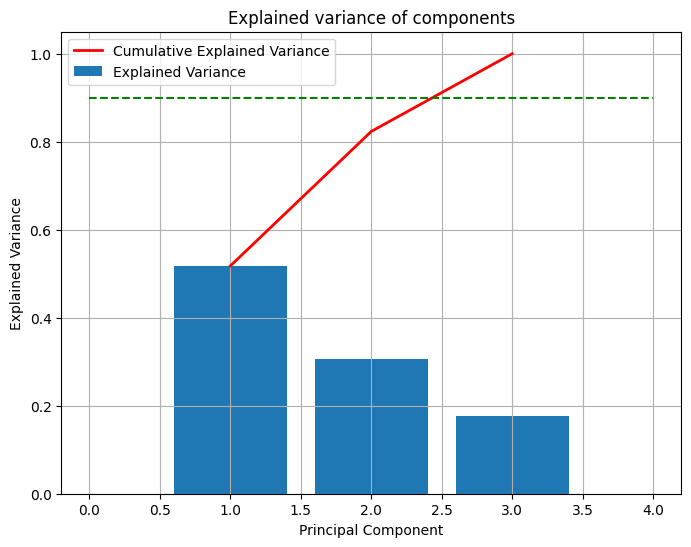

In [34]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

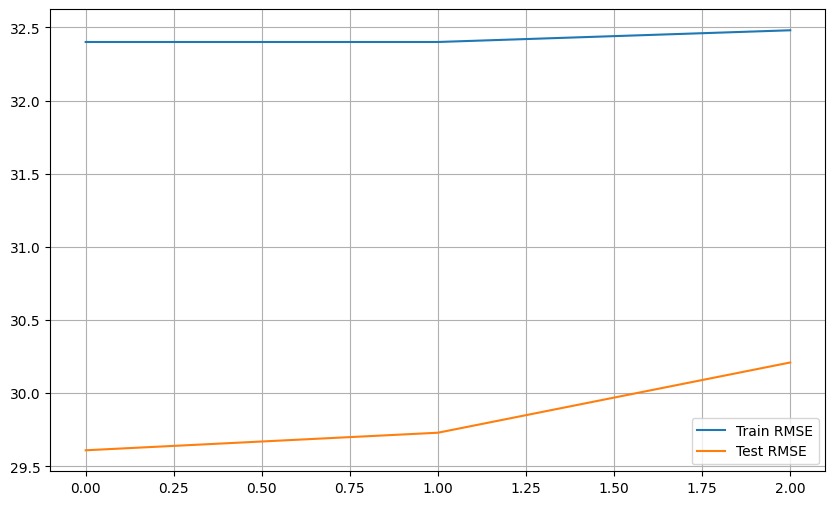

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
m=df.shape[1]-1

for i in range(m):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.fit_transform(Test_X_std)
    
    LR = LinearRegression()
    LR.fit(Train_X_std_pca, Train_Y)

    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)

    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

# plt.figure(figsize=[20,4.5])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.5,20.75])
plt.legend()
plt.grid()
plt.show()

In [36]:
# #Shortlisting the selected Features (with RFE)

# lm = LinearRegression()
# rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-8)             # running RFE
# rfe = rfe.fit(Train_X_std, Train_Y)

# LR = LinearRegression()
# LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

# #print(Train_X_std.loc[:,rfe.support_].columns)

# pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
# pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

# print(np.sqrt(mean_squared_error(Train_Y, pred1)))
# print(np.sqrt(mean_squared_error(Test_Y, pred2)))

# Train_X_std = Train_X_std.loc[:,rfe.support_]
# Test_X_std = Test_X_std.loc[:,rfe.support_]

## 6. Predictive Modeling

In [37]:
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=30].columns.values,1,replace=False)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

## 6.1. Multiple Linear Regression(MLR)

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.00966484 15.37959586 16.08049821]
The Intercept of the Regresion Model was found to be  53.91392405063291


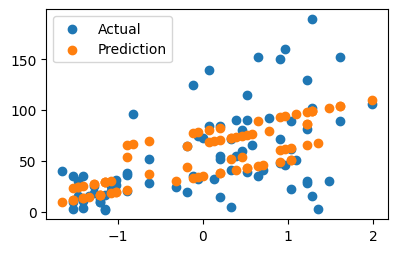



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.4389762890726776
Residual Sum of Squares (RSS) on Training set  ---> 82906.39794704922
Mean Squared Error (MSE) on Training set       ---> 1049.448075279104
Root Mean Squared Error (RMSE) on Training set ---> 32.3951859892655

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.18742136812686264
Residual Sum of Squares (RSS) on Training set  ---> 16896.121689082356
Mean Squared Error (MSE) on Training set       ---> 844.8060844541177
Root Mean Squared Error (RMSE) on Training set ---> 29.06554806732737

--------------------Residual Plots--------------------


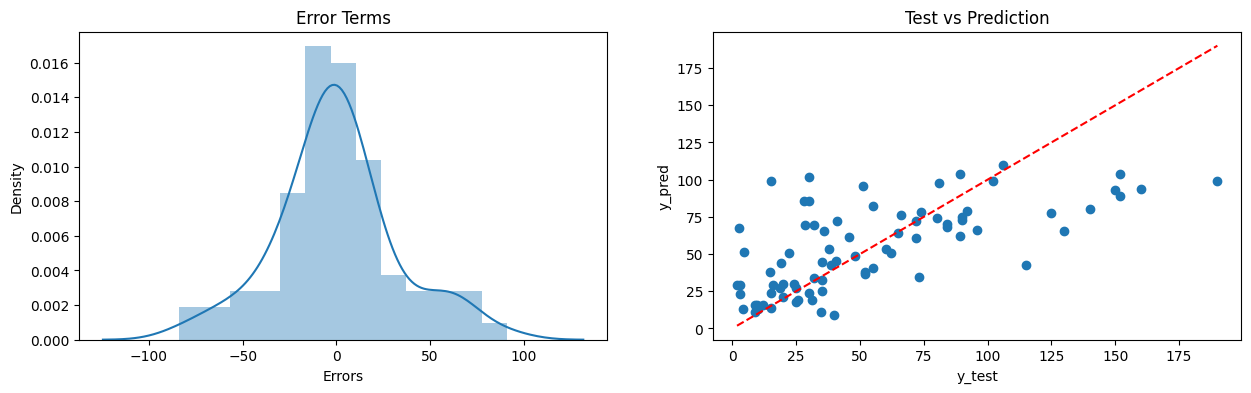

In [38]:
#Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

## 6.2. Ridge Regression Model

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.00966484 15.37959586 16.08049821]
The Intercept of the Regresion Model was found to be  53.91392405063291


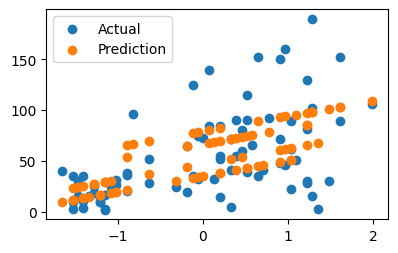



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.43894722551230414
Residual Sum of Squares (RSS) on Training set  ---> 82910.69287265601
Mean Squared Error (MSE) on Training set       ---> 1049.5024414260256
Root Mean Squared Error (RMSE) on Training set ---> 32.39602508682239

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.18838394459286148
Residual Sum of Squares (RSS) on Training set  ---> 16876.106630272512
Mean Squared Error (MSE) on Training set       ---> 843.8053315136257
Root Mean Squared Error (RMSE) on Training set ---> 29.04832751663382

--------------------Residual Plots--------------------


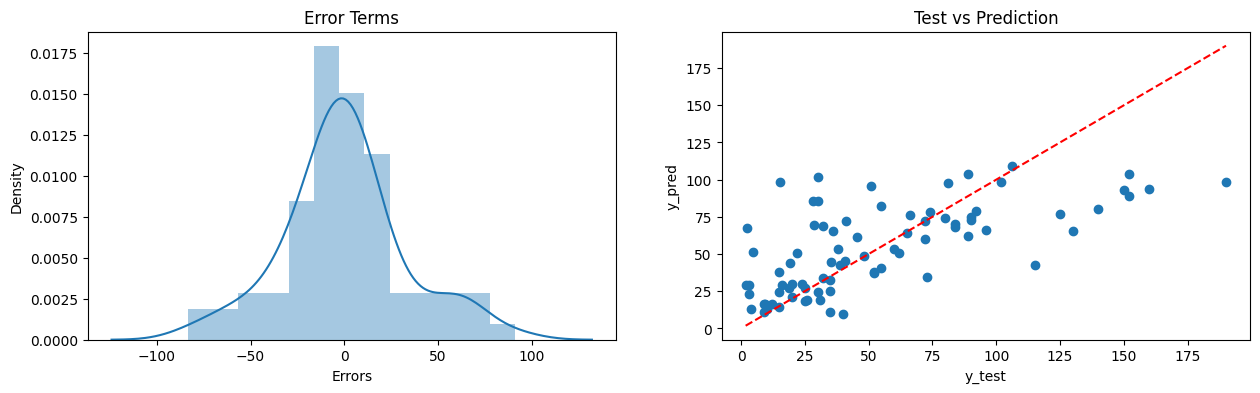

In [40]:
#Creating a Ridge Regression model

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

## 6.3. Lasso Regression Model

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.00966484 15.37959586 16.08049821]
The Intercept of the Regresion Model was found to be  53.91392405063291


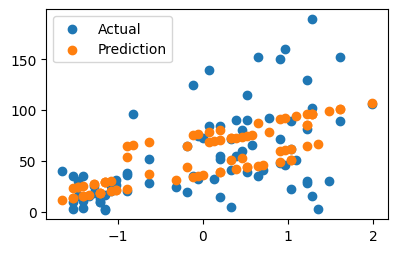



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.43790153073667926
Residual Sum of Squares (RSS) on Training set  ---> 83065.22250395414
Mean Squared Error (MSE) on Training set       ---> 1051.4585127082803
Root Mean Squared Error (RMSE) on Training set ---> 32.426201021832334

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.19977033472461792
Residual Sum of Squares (RSS) on Training set  ---> 16639.346979305516
Mean Squared Error (MSE) on Training set       ---> 831.9673489652757
Root Mean Squared Error (RMSE) on Training set ---> 28.843844212678647

--------------------Residual Plots--------------------


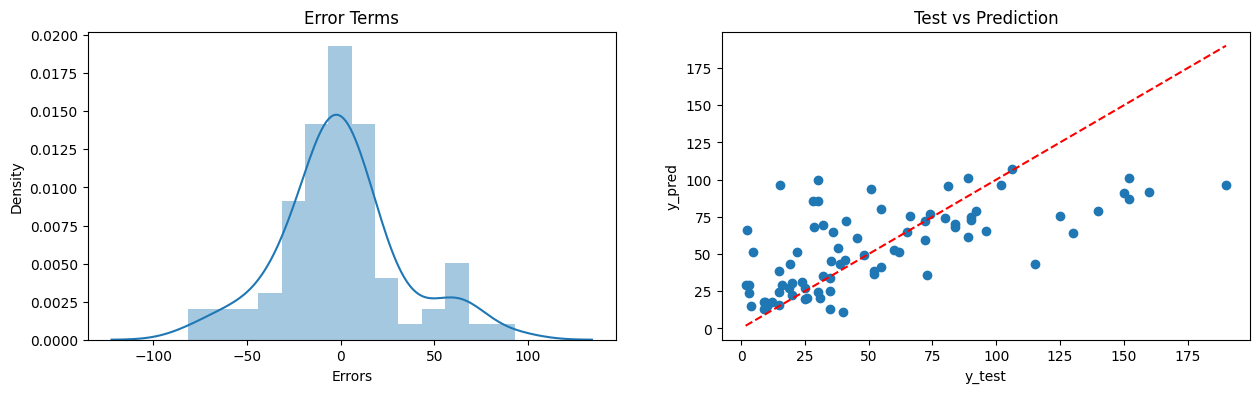

In [41]:
#Creating a Ridge Regression model

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

## 6.4. Elastic-Net Regression

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.00966484 15.37959586 16.08049821]
The Intercept of the Regresion Model was found to be  53.91392405063291


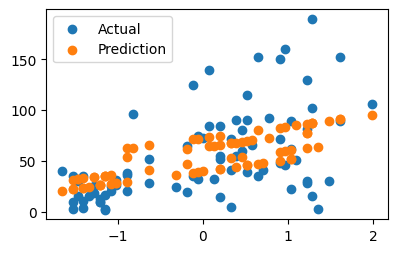



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.40892962437998787
Residual Sum of Squares (RSS) on Training set  ---> 87346.60375559906
Mean Squared Error (MSE) on Training set       ---> 1105.6532120961906
Root Mean Squared Error (RMSE) on Training set ---> 33.251364063692044

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.19490958400213443
Residual Sum of Squares (RSS) on Training set  ---> 16740.41761110155
Mean Squared Error (MSE) on Training set       ---> 837.0208805550776
Root Mean Squared Error (RMSE) on Training set ---> 28.931313149511162

--------------------Residual Plots--------------------


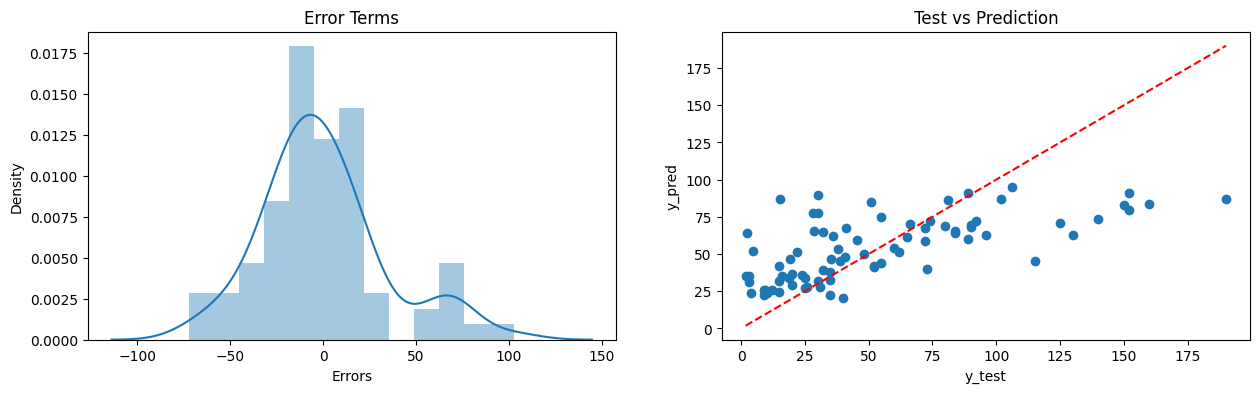

In [42]:
#Creating a ElasticNet Regression model

ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

## 6.5. Polynomial Regression Model

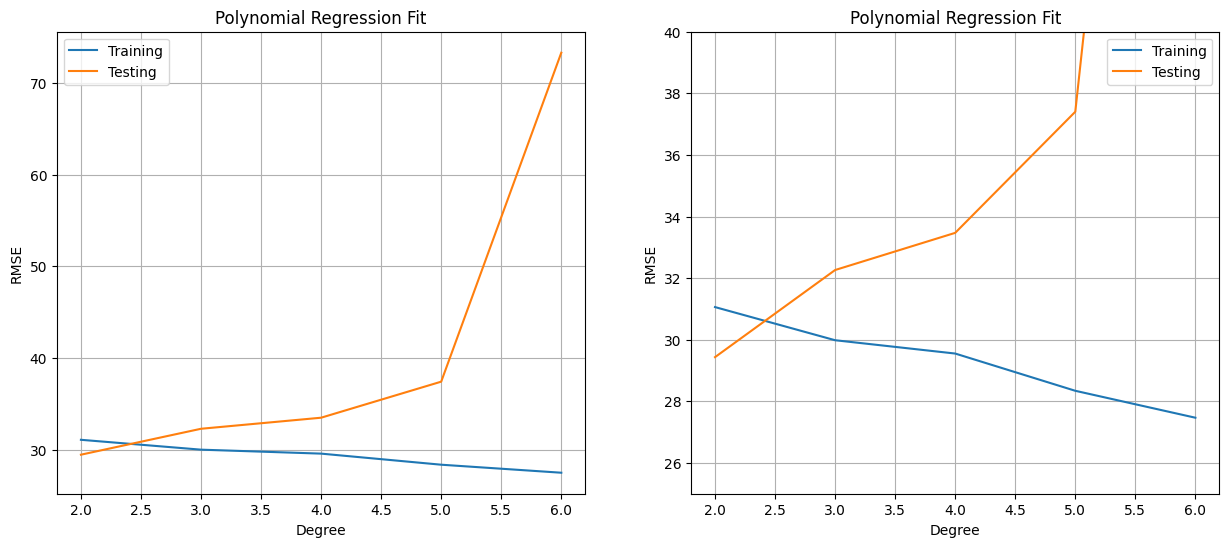

In [43]:
#Checking polynomial regression performance on various degrees

Trr=[]; Tss=[]
n_degree=7

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([25,40])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

- 다항회귀모델을 선택할 수 있음. 최적의 훈련 및 테스트 점수를 제공함

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.00966484 15.37959586 16.08049821]
The Intercept of the Regresion Model was found to be  53.91392405063291


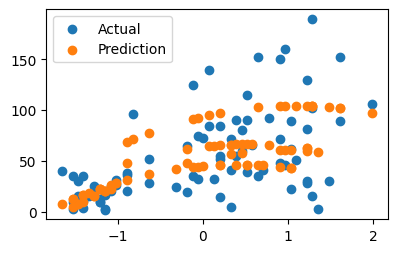



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.4842732199553984
Residual Sum of Squares (RSS) on Training set  ---> 76212.5536328125
Mean Squared Error (MSE) on Training set       ---> 964.7158687697784
Root Mean Squared Error (RMSE) on Training set ---> 31.059875543372332

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.1666770231727941
Residual Sum of Squares (RSS) on Training set  ---> 17327.46330078125
Mean Squared Error (MSE) on Training set       ---> 866.3731650390625
Root Mean Squared Error (RMSE) on Training set ---> 29.434217588362404

--------------------Residual Plots--------------------


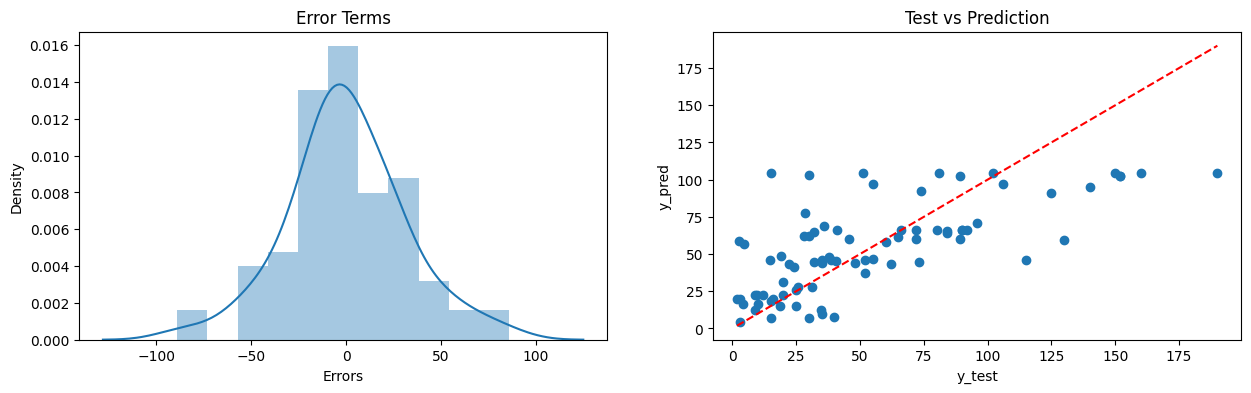

In [44]:
#Using the 2nd Order Polynomial Regression model (degree=3)

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

## 6.6.  Comparing the Evaluation Metics of the Models

In [45]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.438976,0.187421,82906.397947,16896.121689,1049.448075,844.806084,32.395186,29.065548
Ridge Linear Regression (RLR),0.438947,0.188384,82910.692873,16876.106630,1049.502441,843.805332,32.396025,29.048328
Lasso Linear Regression (LLR),0.437902,0.199770,83065.222504,16639.346979,1051.458513,831.967349,32.426201,28.843844
Elastic-Net Regression (ENR),0.408930,0.194910,87346.603756,16740.417611,1105.653212,837.020881,33.251364,28.931313
Polynomial Regression (PNR),0.484273,0.166677,76212.553633,17327.463301,964.715869,866.373165,31.059876,29.434218


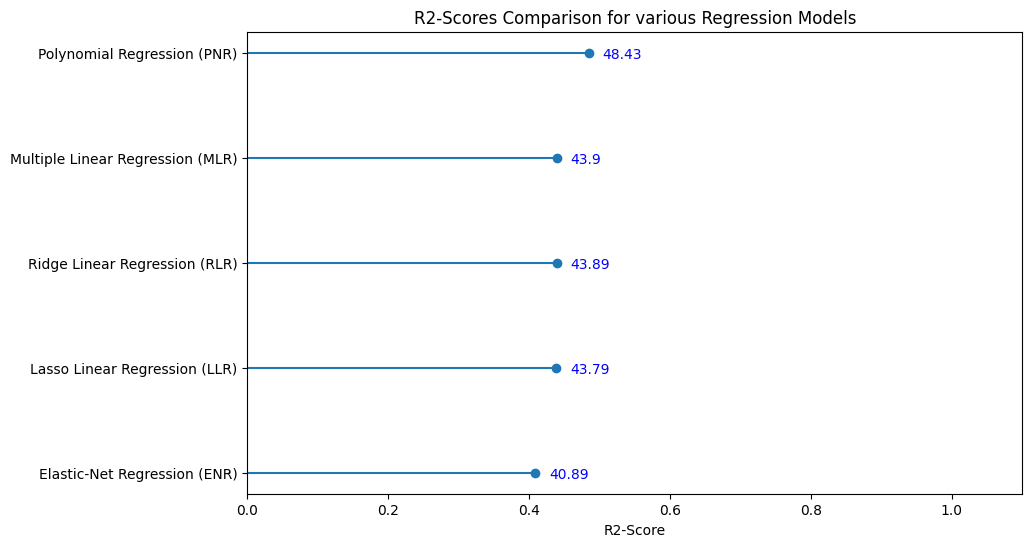

In [46]:
# R2-Scores Comparison for different Regression Models

R2 = round(EMC['Train-R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()

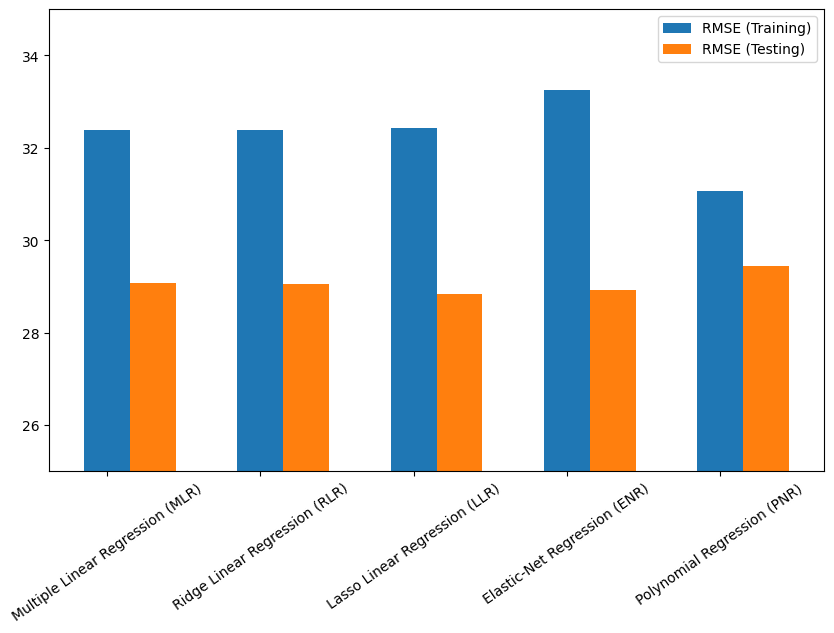

In [47]:
# Root Mean SquaredError Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5
#baxes = brokenaxes(ylims=((0,4),(524,532)))
#baxes.bar(np.arange(s), Model_Evaluation_Comparison_Matrix[cc[-2]].values, width=0.3, label='RMSE (Training)')
#baxes.bar(np.arange(s)+0.3, Model_Evaluation_Comparison_Matrix[cc[-1]].values, width=0.3, label='RMSE (Testing)')
# for index, value in enumerate(Model_Evaluation_Comparison_Matrix[cc[-2]].values):
#     plt.text(round(value,2), index, str(round(value,2)))
# for index, value in enumerate(Model_Evaluation_Comparison_Matrix[cc[-1]].values):
#     plt.text(round(value,2), index, str(round(value,2)))
plt.bar(np.arange(5), Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(5)+0.3, Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(5),EMC.index, rotation =35)
plt.legend()
plt.ylim([25,35])
plt.show()

Inference:\ Lesser the RMSE, better the model! Also, provided the model should have close proximity with the training & testing scores. For this problem, it is can be said that polynomial regressions clearly is the best fit for the given dataset.

낮은 RMSE일수록 모델이 더 좋음, 모델이 훈련 및 테스트 점수와 근접해야 함. 따라서 다항 회귀 모델이 가장 적합하다

## 7. Project Outcomes & Conclusions

### Here are some of the key outcomes of the project:
- The Dataset was quiet small with just 200 samples & after preprocessing 1% of the datasamples were dropped.
- Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.
- The features had high multicollinearity, hence in Feature Extraction step, we shortlisted the appropriate features with VIF Technique.
- Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset.
- While, Polynomial Regression (Order-2) was the best choise, yet it is safe to use multiple regression algorithm, as their scores were quiet comparable & also they're more generalisable.

데이터셋 크기 및 전처리:
데이터셋은 매우 작았으며, 전처리 후에는 200개의 샘플만 남았습니다.
전처리 과정에서 데이터의 1%가 삭제되었습니다.

데이터 분포 및 관계 시각화:
데이터의 분포 및 관계를 시각화함으로써 특징 집합에 대한 통찰력을 얻는 데 도움이 되었습니다.

다중공선성과 특징 추출:
특징 간 높은 다중공선성이 있었기 때문에, VIF 기법을 사용하여 적절한 특징을 선별하는 특징 추출 단계를 거쳤습니다.

다양한 알고리즘의 테스트:
기본 하이퍼파라미터를 사용하여 여러 알고리즘을 테스트한 결과, 이 특정 데이터셋에 대한 다양한 모델의 성능에 대한 이해를 얻을 수 있었습니다.

다항 회귀 (2차)의 선택:
다항 회귀 (2차)가 최선의 선택이었지만, 다중 회귀 알고리즘을 사용하는 것이 안전합니다. 왜냐하면 그들의 점수는 꽤 비교 가능하며 더 일반화할 수 있기 때문입니다.
이 결과들을 종합하면, 작은 크기의 데이터셋에서 다양한 모델을 테스트하고, 다중공선성 문제를 다루고, 적절한 특징을 선택하여 일반적이고 안정적인 모델을 얻었습니다. 또한, 다항 회귀가 최적이었지만, 여러 회귀 알고리즘을 사용할 때 그들의 성능이 유사하게 나타났습니다.